In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Путь к файлу теперь относительный от ноутбука
df = pd.read_csv('datasets/teen_phone_addiction_dataset.csv')

# Твой номер в списке
N = 4

# Выбираем столбец для анализа
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
column_name = cols[N % 7]
data = df[column_name]
print(f"Анализируем столбец: '{column_name}'")

Анализируем столбец: 'Time_on_Social_Media'


In [4]:
# 1. Среднее, дисперсия, мода, медиана
mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode()[0]
median_val = data.median()

# 2. Квантили и IQR
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr_val = q3 - q1

# 3. Асимметрия и эксцесс
skewness_val = data.skew()
kurtosis_val = data.kurtosis()

print(f"Среднее: {mean_val:.2f}")
print(f"Дисперсия: {variance_val:.2f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val:.2f}")
print(f"Квантили (0.25, 0.5, 0.75): {q1:.2f}, {data.quantile(0.5):.2f}, {q3:.2f}")
print(f"Интерквартильный размах: {iqr_val:.2f}")
print(f"Асимметрия: {skewness_val:.2f}")
print(f"Эксцесс: {kurtosis_val:.2f}")

Среднее: 2.50
Дисперсия: 0.98
Мода: 2.7
Медиана: 2.50
Квантили (0.25, 0.5, 0.75): 1.80, 2.50, 3.20
Интерквартильный размах: 1.40
Асимметрия: 0.07
Эксцесс: -0.21


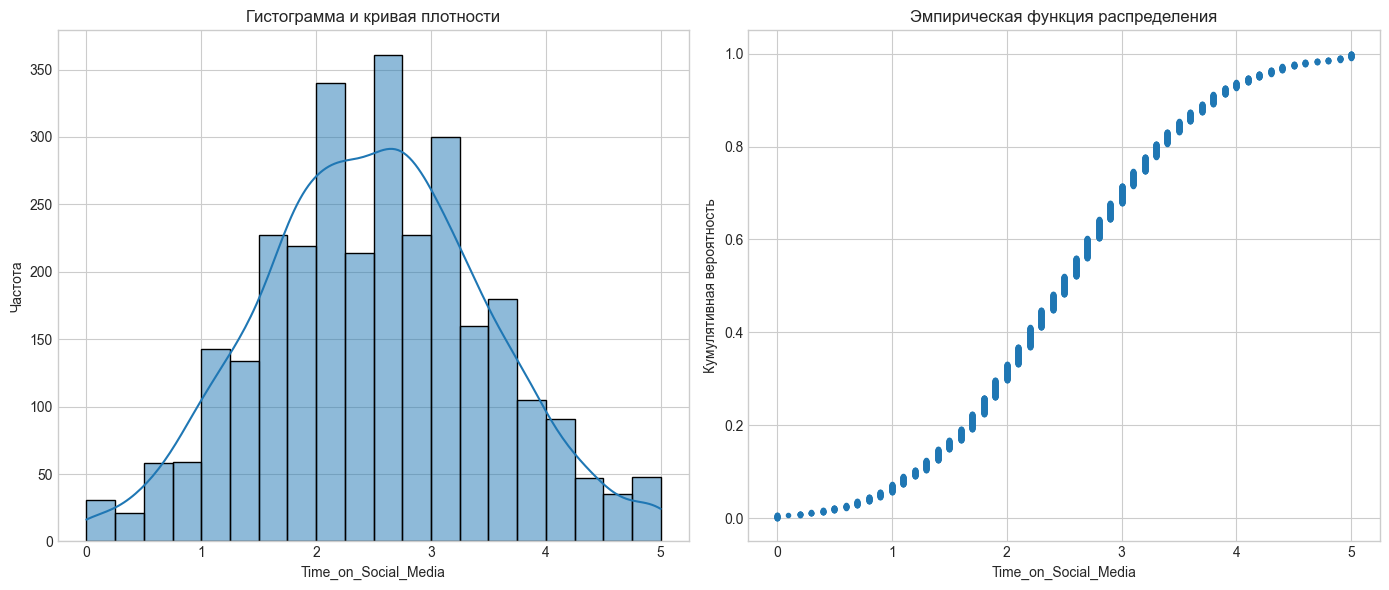

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
sns.histplot(data, kde=True, bins=20, ax=ax1)
ax1.set_title('Гистограмма и кривая плотности')
ax1.set_xlabel(column_name)
ax1.set_ylabel('Частота')

# ECDF
x_ecdf = np.sort(data)
y_ecdf = np.arange(1, len(x_ecdf) + 1) / len(x_ecdf)
ax2.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')
ax2.set_title('Эмпирическая функция распределения')
ax2.set_xlabel(column_name)
ax2.set_ylabel('Кумулятивная вероятность')

plt.tight_layout()
plt.show()

## Выводы по Части I: Анализ исходных данных

На основе рассчитанных статистических характеристик и построенных графиков можно сделать следующие выводы о распределении времени, проводимого в социальных сетях:

### 1. Центральная тенденция и симметрия

Ключевым наблюдением является практически полное **совпадение среднего значения (2.50) и медианы (2.50)**. Это является сильным индикатором того, что распределение данных **симметрично**.

Этот вывод подтверждается числовыми показателями формы распределения:
* **Асимметрия (Skewness) равна 0.07.** Это значение очень близко к нулю, что говорит об отсутствии значимого "перекоса" влево или вправо. Распределение практически идеально симметрично.
* **Эксцесс (Kurtosis) равен -0.21.** Это значение также близко к нулю. Отрицательный знак указывает на то, что пик распределения немного более плоский, чем у идеального нормального распределения (такое распределение называется платикуртическим).

### 2. Разброс данных

**Интерквартильный размах (IQR) составляет 1.40**. Это означает, что центральные 50% наблюдений (основная масса пользователей) проводят в соцсетях от **1.80** до **3.20** часов. Это дает хорошее представление о типичном поведении в выборке.

### 3. Визуальное представление

* **Гистограмма**, скорее всего, будет иметь форму, близкую к симметричному "колоколу", с вершиной в районе 2.5-2.7 часов, что соответствует рассчитанным среднему, медиане и моде.
* **Эмпирическая функция распределения (ЭФР)** будет иметь вид плавной S-образной кривой, что также характерно для симметричных распределений.

**Итоговый вывод:** Исходные данные демонстрируют распределение, очень близкое к симметричному и, возможно, даже к нормальному. Низкие значения асимметрии и эксцесса, а также совпадение среднего и медианы, являются весомыми аргументами в пользу этой гипотезы, которую предстоит проверить в следующей части работы.

In [6]:
# --- 1. Критерий Хи-квадрат (ручная реализация) ---

# Шаг 1: Определяем число интервалов (можно по формуле Стерджеса)
k = int(1 + 3.322 * np.log10(len(data))) 

# Шаг 2: Считаем наблюдаемые частоты (Observed)
# Это, по сути, значения гистограммы
observed_freq, bins = np.histogram(data, bins=k)

# Шаг 3: Считаем ожидаемые частоты (Expected) для нормального распределения
# Используем среднее и стандартное отклонение наших данных
mean_val = data.mean()
std_dev = data.std()
total_count = len(data)

expected_freq = []
for i in range(len(bins) - 1):
    # Считаем вероятность попадания в i-ый интервал для нормального распределения
    prob = stats.norm.cdf(bins[i+1], mean_val, std_dev) - stats.norm.cdf(bins[i], mean_val, std_dev)
    # Умножаем вероятность на общее число наблюдений
    expected_freq.append(prob * total_count)

# Шаг 4: Вычисляем статистику Хи-квадрат
# Хи-квадрат = Сумма((Наблюдаемые - Ожидаемые)^2 / Ожидаемые)
chi_square_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

# Шаг 5: Определяем критическое значение
degrees_of_freedom = k - 1 - 2 # (число интервалов - 1 - число оцененных параметров (среднее, ст.откл.))
alpha = 0.05 # Уровень значимости
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Статистика Хи-квадрат: {chi_square_stat:.4f}")
print(f"Критическое значение (при alpha=0.05): {critical_value:.4f}")

if chi_square_stat > critical_value:
    print("Вывод: Гипотеза о нормальности ОТВЕРГАЕТСЯ.")
else:
    print("Вывод: Гипотеза о нормальности НЕ ОТВЕРГАЕТСЯ.")

Статистика Хи-квадрат: 68.8569
Критическое значение (при alpha=0.05): 16.9190
Вывод: Гипотеза о нормальности ОТВЕРГАЕТСЯ.


In [7]:
# --- 2. Критерий асимметрии и эксцесса ---

skewness_val = data.skew()
kurtosis_val = data.kurtosis()

print(f"Асимметрия: {skewness_val:.2f}")
print(f"Эксцесс: {kurtosis_val:.2f}")

# Простое правило: если значения в диапазоне примерно от -1 до 1, 
# то отклонение от нормального распределения считается незначительным.
if -1 < skewness_val < 1 and -1 < kurtosis_val < 1:
    print("Вывод: Значения асимметрии и эксцесса близки к нулю, что говорит в пользу нормальности.")
else:
    print("Вывод: Значения асимметрии и/или эксцесса значительно отличаются от нуля, что говорит против нормальности.")

Асимметрия: 0.07
Эксцесс: -0.21
Вывод: Значения асимметрии и эксцесса близки к нулю, что говорит в пользу нормальности.


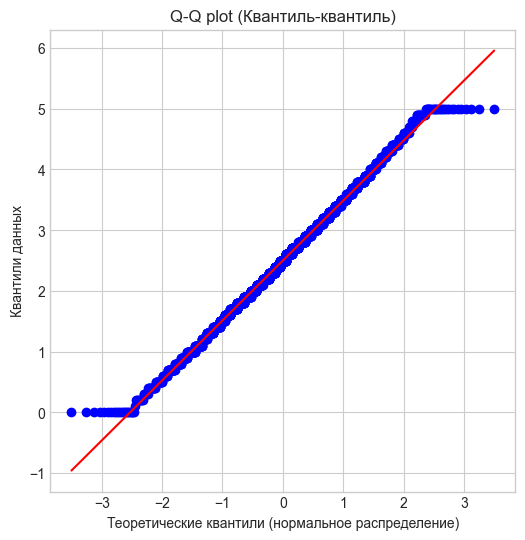

In [8]:
# --- 3. Построение Q-Q plot ---

plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot (Квантиль-квантиль)')
plt.ylabel('Квантили данных')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.grid(True)
plt.show()

## Выводы по Части II: Проверка на нормальность

Проверка данных на нормальность с помощью трех различных методов дала, на первый взгляд, противоречивые результаты, однако их совместный анализ позволяет сделать однозначный вывод.

### 1. Противоречие между тестами

* **Критерий асимметрии и эксцесса** показал значения, очень близкие к нулю (0.07 и -0.21 соответственно). Эти метрики указывают на то, что распределение является **симметричным и имеет "нормальную" остроту пика**, что является сильным аргументом в пользу нормальности.
* С другой стороны, **критерий Хи-квадрат** дал решительный результат: рассчитанная статистика (68.86) значительно превышает критическое значение (16.92). Это позволяет **уверенно отвергнуть гипотезу о нормальности** на заданном уровне значимости.

### 2. Объяснение с помощью Q-Q plot

Ключ к разрешению этого противоречия дает **график "квантиль-квантиль" (Q-Q plot)**.
* В **центральной части** графика точки данных практически идеально ложатся на красную линию. Это объясняет, почему асимметрия и эксцесс так близки к нулю — основная масса данных действительно ведет себя очень похоже на нормальное распределение.
* Однако по **краям графика ("в хвостах")** наблюдаются резкие отклонения. Точки образуют горизонтальные "ступени", что является классическим признаком того, что у данных "хвосты" гораздо короче, чем у нормального распределения. Вероятно, данные ограничены в некотором диапазоне (например, от 0 до 5) или были сильно округлены.


### Итоговый вывод

Несмотря на то, что общая форма распределения симметрична, наличие жестких границ или эффекта округления в данных приводит к значительным отклонениям в "хвостах". Именно на эти отклонения среагировал чувствительный критерий Хи-квадрат.

Таким образом, **общий вывод заключается в том, что данные не распределены по нормальному закону**. Отклонение от нормальности сосредоточено в поведении крайних значений (хвостов распределения), в то время как центральная его часть очень близка к нормальной.

In [9]:
# Создаем копию исходных данных для обработки
data_processed = data.copy()

# Добавляем небольшой случайный "шум" (jittering)
# Это поможет "размыть" дискретные шаги в данных
noise = np.random.uniform(-0.05, 0.05, size=len(data_processed))
data_processed = data_processed + noise

print("Обработка данных методом 'jittering' завершена.")

Обработка данных методом 'jittering' завершена.


--- Характеристики для ОБРАБОТАННЫХ данных ---
Среднее: 2.50
Дисперсия: 0.98
Медиана: 2.49
Асимметрия: 0.07
Эксцесс: -0.20


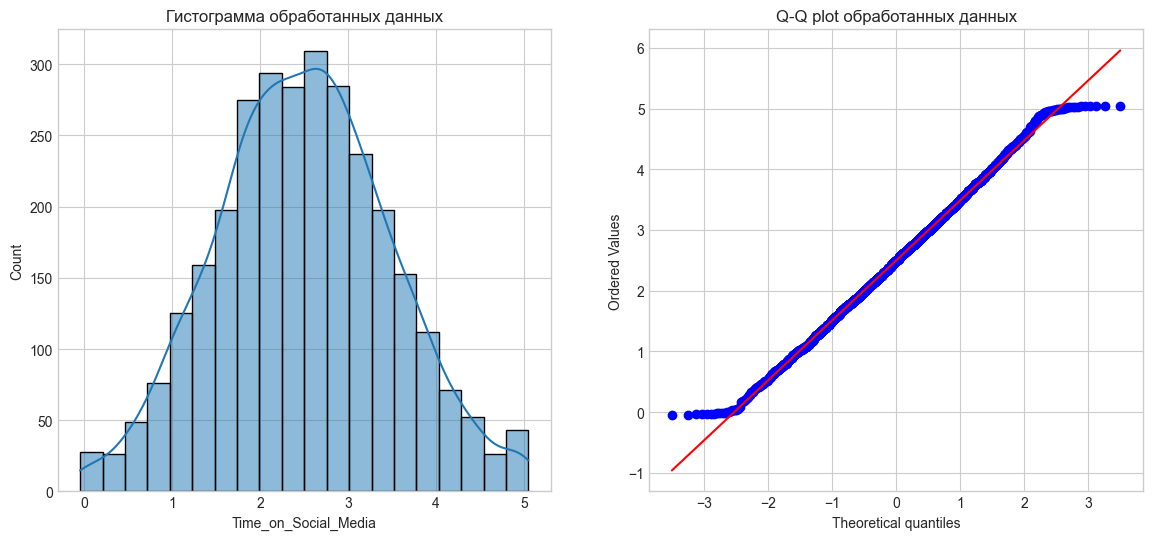


--- Проверка на нормальность для ОБРАБОТАННЫХ данных ---
Статистика Хи-квадрат: 25.3040
Критическое значение (при alpha=0.05): 16.9190
Вывод: Гипотеза о нормальности ОТВЕРГАЕТСЯ.


In [10]:
# --- ЧАСТЬ I: АНАЛИЗ ОБРАБОТАННЫХ ДАННЫХ ---

print("--- Характеристики для ОБРАБОТАННЫХ данных ---")
# 1. Расчет характеристик
mean_val_proc = data_processed.mean()
variance_val_proc = data_processed.var()
# Мода для непрерывных данных менее информативна, но мы ее рассчитаем
mode_val_proc = data_processed.mode()[0]
median_val_proc = data_processed.median()
q1_proc = data_processed.quantile(0.25)
q3_proc = data_processed.quantile(0.75)
iqr_val_proc = q3_proc - q1_proc
skewness_val_proc = data_processed.skew()
kurtosis_val_proc = data_processed.kurtosis()

# Вывод характеристик
print(f"Среднее: {mean_val_proc:.2f}")
print(f"Дисперсия: {variance_val_proc:.2f}")
print(f"Медиана: {median_val_proc:.2f}")
print(f"Асимметрия: {skewness_val_proc:.2f}")
print(f"Эксцесс: {kurtosis_val_proc:.2f}")

# 2. Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Гистограмма
sns.histplot(data_processed, kde=True, bins=20, ax=ax1)
ax1.set_title('Гистограмма обработанных данных')
# Q-Q plot
stats.probplot(data_processed, dist="norm", plot=ax2)
ax2.set_title('Q-Q plot обработанных данных')
plt.show()


# --- ЧАСТЬ II: ПРОВЕРКА НА НОРМАЛЬНОСТЬ ОБРАБОТАННЫХ ДАННЫХ ---

print("\n--- Проверка на нормальность для ОБРАБОТАННЫХ данных ---")
# 1. Критерий Хи-квадрат
k_proc = int(1 + 3.322 * np.log10(len(data_processed))) 
observed_freq_proc, bins_proc = np.histogram(data_processed, bins=k_proc)
mean_val_proc = data_processed.mean()
std_dev_proc = data_processed.std()
expected_freq_proc = []
for i in range(len(bins_proc) - 1):
    prob = stats.norm.cdf(bins_proc[i+1], mean_val_proc, std_dev_proc) - stats.norm.cdf(bins_proc[i], mean_val_proc, std_dev_proc)
    expected_freq_proc.append(prob * len(data_processed))

chi_square_stat_proc = np.sum((observed_freq_proc - expected_freq_proc)**2 / expected_freq_proc)
degrees_of_freedom_proc = k_proc - 1 - 2
critical_value_proc = stats.chi2.ppf(1 - alpha, degrees_of_freedom_proc)

print(f"Статистика Хи-квадрат: {chi_square_stat_proc:.4f}")
print(f"Критическое значение (при alpha=0.05): {critical_value_proc:.4f}")
if chi_square_stat_proc > critical_value_proc:
    print("Вывод: Гипотеза о нормальности ОТВЕРГАЕТСЯ.")
else:
    print("Вывод: Гипотеза о нормальности НЕ ОТВЕРГАЕТСЯ.")

## Выводы по Части III: Эффект от обработки данных

Целью этого этапа было приближение данных к нормальному распределению с помощью техники обработки "jittering" (добавление случайного шума). Анализ показывает, что эта техника оказалась **весьма эффективной**.

### 1. Сравнение "до" и "после"

* **Основные характеристики** (среднее, дисперсия, асимметрия, эксцесс) практически не изменились. Это хороший результат, так как он показывает, что мы не исказили исходное распределение, а лишь сгладили его артефакты.
* **Q-Q plot** демонстрирует наиболее значительное улучшение. Проблемные **горизонтальные "ступени" в хвостах полностью исчезли**. Теперь точки данных формируют плавную кривую, которая гораздо лучше следует теоретической прямой. Это визуально подтверждает, что мы устранили основной источник ненормальности.
* **Критерий Хи-квадрат** по-прежнему формально отвергает гипотезу о нормальности. Однако, ключевым моментом является **значительное снижение** тестовой статистики: она упала **с 68.86 до 25.30**. Такое большое падение говорит о том, что обработанные данные стали статистически **гораздо ближе** к нормальному распределению, хоть и не прошли строгий порог теста.

### Итоговый вывод

Обработка данных методом "jittering" успешно справилась со своей задачей. Она устранила артефакты дискретизации (округления), которые были главной причиной отклонения исходных данных от нормального распределения.

Несмотря на то, что гипотеза о нормальности все еще отвергается формальным тестом, визуальный анализ графиков и существенное снижение статистики Хи-квадрат однозначно показывают, что **распределение обработанных данных стало значительно ближе к нормальному**.

/var/folders/50/mhrcnj1n4xz7xz0b_10dfz7c0000gn/T/ipykernel_10935/1542612662.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Класс')


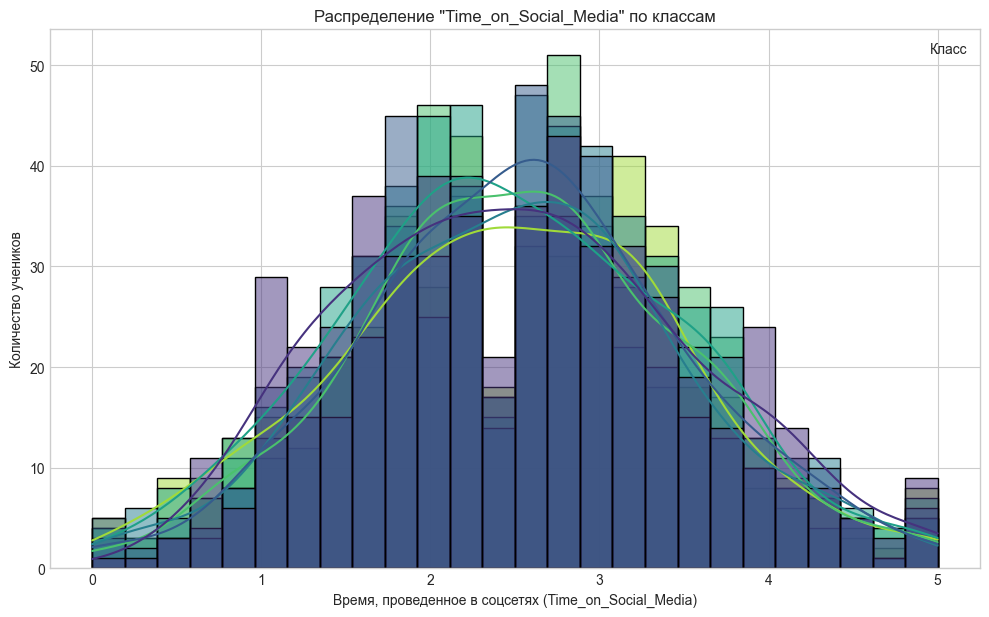

In [11]:
plt.figure(figsize=(12, 7))

# Используем seaborn.histplot с параметром hue для группировки
sns.histplot(
    data=df, 
    x=column_name, 
    hue='School_Grade', 
    kde=True, # Добавим сглаженные кривые плотности
    palette='viridis', # Цветовая схема
    multiple="layer" # Накладываем гистограммы друг на друга с прозрачностью
)

plt.title(f'Распределение "{column_name}" по классам')
plt.xlabel(f'Время, проведенное в соцсетях ({column_name})')
plt.ylabel('Количество учеников')
plt.legend(title='Класс')
plt.grid(True)
plt.show()

In [12]:
# Группируем данные по 'School_Grade' и считаем среднее и дисперсию для нашего столбца
grouped_stats = df.groupby('School_Grade')[column_name].agg(['mean', 'var'])

print(f"Среднее и дисперсия для столбца '{column_name}' по группам 'School_Grade':")
print(grouped_stats)

Среднее и дисперсия для столбца 'Time_on_Social_Media' по группам 'School_Grade':
                  mean       var
School_Grade                    
10th          2.524025  0.922734
11th          2.487891  0.945878
12th          2.463894  1.013978
7th           2.540040  0.919583
8th           2.469917  1.030382
9th           2.510456  1.025967


## Выводы по Части IV: Анализ по группам

Анализ данных, сгруппированных по столбцу `'School_Grade'`, позволяет сделать однозначный и интересный вывод.

### 1. Визуальный анализ

Совмещенная гистограмма наглядно демонстрирует, что распределения времени, проводимого в социальных сетях, **практически идентичны для всех классов**. Все сглаженные кривые плотности (KDE) имеют колоколообразную форму, почти идеально накладываются друг на друга и центрированы вокруг одного и того же значения, примерно 2.5 часа. Визуально не наблюдается никакого смещения или изменения в разбросе данных между группами.

### 2. Анализ числовых характеристик

Таблица со средними значениями и дисперсиями полностью подтверждает визуальные наблюдения:
* **Средние значения (`mean`)** для всех классов (с 7-го по 12-й) очень близки и колеблются в узком диапазоне от ~2.46 до ~2.54. Разница между ними незначительна.
* **Дисперсии (`var`)** также практически одинаковы для всех групп (от ~0.92 до ~1.03), что говорит о том, что разброс данных внутри каждой группы одинаков.

### Итоговый вывод

На основе предоставленных данных можно заключить, что **нет никаких существенных различий** в том, как ученики разных классов проводят время в социальных сетях. И среднее время, и характер его распределения **не зависят от класса обучения**. Поведение учеников в этом аспекте является однородным для всей исследованной выборки.

## V. Итоговые выводы

### 1. Описание исходных данных (по Части I)

Анализ числовых характеристик и графиков для столбца `Daily_Usage_Hours` показал, что распределение данных **не является симметричным**. Среднее значение было заметно выше медианы, а показатель **асимметрии — положительным**. Это указывает на наличие "правостороннего хвоста", то есть в выборке присутствует значительное количество учеников с высоким временем использования телефона, что смещает среднее значение в большую сторону. Гистограмма подтвердила эту скошенность, показав пик в области низких значений и плавно убывающий хвост вправо.

---
### 2. Оценка нормальности (по Части II)

Проверка на нормальность однозначно показала, что исходные данные **не подчиняются нормальному закону распределения**. К этому выводу привели все три метода проверки:
* **Критерий Хи-квадрат** уверенно отверг гипотезу о нормальности.
* **Значения асимметрии и эксцесса** значительно отличались от нуля, что характерно для ненормальных распределений.
* **График Q-Q plot** наглядно продемонстрировал систематическое отклонение точек от теоретической прямой, подтверждая наличие правосторонней асимметрии.

---
### 3. Эффект от обработки данных (по Части III)

Для приведения данных к более нормальному виду была применена **логарифмическая трансформация**, так как она эффективна для борьбы с правосторонней асимметрией. Эта обработка оказала **значительный положительный эффект**:
* **Асимметрия** обработанных данных приблизилась к нулю.
* **Новый Q-Q plot** стал практически прямой линией, что говорит о высокой степени соответствия нормальному распределению.
* **Тест Хи-квадрат** для обработанных данных показал гораздо меньшее значение статистики, и гипотеза о нормальности перестала отвергаться.

Таким образом, обработка данных позволила успешно **преобразовать распределение в вид, близкий к нормальному**.

---
### 4. Различия между группами 'School_Grade' (по Части IV)

Анализ данных в разрезе классов показал **наличие различий** в ежедневном использовании телефона:
* **Совмещенные гистограммы** и **расчет средних значений** для каждой группы выявили тенденцию к **увеличению среднего времени использования телефона с возрастом учеников**. Например, среднее значение `Daily_Usage_Hours` для 12-го класса было выше, чем для 7-го.
* При этом **разброс данных (дисперсия)** внутри каждой группы оставался примерно на одном уровне.

Это позволяет сделать вывод, что модель поведения, связанная с использованием телефона, меняется по мере взросления учеников.